Let us now explore the experiment results for the first few models to narrow the hyperparameter search space for the KDE models:

In [2]:
import json
import pandas as pd

res = []
with open("../results/nb-selection-results.jsonl", "r") as f:
    for line in f:
        res.append(json.loads(line))
# Convert to DataFrame for easier analysis
res = pd.DataFrame(res)
categorical_cols = ["model_class", "categorical_estimator_class", "continuous_estimator_class", "dataset"]
for col in categorical_cols:
    res[col] = res[col].astype("category")
res.head()

,model_class,categorical_estimator_class,continuous_estimator_class,dataset,num_folds,fold_index,categorical_estimator_params,continuous_estimator_params,accuracy,b_recall,b_precision,b_f1_score,s_recall,s_precision,s_f1_score,ams_score
0,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-07, 'bins': 520}",0.685881,0.703805,0.795453,0.746828,0.651351,0.533039,0.586286,0.428922
1,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,5,{},"{'laplace_smoothing': 0.001, 'bins': 730}",0.682919,0.704658,0.791346,0.745490,0.640902,0.528918,0.579550,0.439115
2,BespokeNB,CategoricalEstimator,HistogramEstimator,drop-columns,10,8,{},{'bins': 350},0.746528,0.861086,0.778633,0.817786,0.523594,0.659500,0.583741,0.541244
3,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,4,{},"{'laplace_smoothing': 0.01, 'bins': 920}",0.658016,0.530869,0.914600,0.671800,0.904073,0.498952,0.643023,0.519674
4,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-05, 'bins': 760}",0.692106,0.600232,0.898307,0.719624,0.869099,0.530186,0.658600,0.552915


In [3]:
# Let us explore the dependency of the scores with the laplace_smoothing parameter.

# First, filter the results for the relevant experiments (those Robust or CategoricalAware).
laplace_results = res[
    (res["continuous_estimator_class"].str.contains("Robust")) | (res["model_class"].str.contains("CategoricalAware"))
]
laplace_results.head()

,model_class,categorical_estimator_class,continuous_estimator_class,dataset,num_folds,fold_index,categorical_estimator_params,continuous_estimator_params,accuracy,b_recall,b_precision,b_f1_score,s_recall,s_precision,s_f1_score,ams_score
0,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-07, 'bins': 520}",0.685881,0.703805,0.795453,0.746828,0.651351,0.533039,0.586286,0.428922
1,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,5,{},"{'laplace_smoothing': 0.001, 'bins': 730}",0.682919,0.704658,0.791346,0.745490,0.640902,0.528918,0.579550,0.439115
3,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,4,{},"{'laplace_smoothing': 0.01, 'bins': 920}",0.658016,0.530869,0.914600,0.671800,0.904073,0.498952,0.643023,0.519674
4,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-05, 'bins': 760}",0.692106,0.600232,0.898307,0.719624,0.869099,0.530186,0.658600,0.552915
5,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,1,{},"{'laplace_smoothing': 0.1, 'bins': 930}",0.661529,0.677263,0.779153,0.724644,0.631309,0.504581,0.560876,0.421515


In [4]:
# Now let's create a column with the laplace_smoothing value for easier plotting.
from typing import Optional


def extract_laplace_smoothing(params: dict) -> Optional[float]:
    return params.get("laplace_smoothing", None)


laplace_results["laplace_smoothing"] = laplace_results["continuous_estimator_params"].apply(extract_laplace_smoothing)
laplace_results.head()

C:\Users\mirxm\AppData\Local\Temp\ipykernel_15892\3176940192.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laplace_results["laplace_smoothing"] = laplace_results["continuous_estimator_params"].apply(extract_laplace_smoothing)


,model_class,categorical_estimator_class,continuous_estimator_class,dataset,num_folds,fold_index,categorical_estimator_params,continuous_estimator_params,accuracy,b_recall,b_precision,b_f1_score,s_recall,s_precision,s_f1_score,ams_score,laplace_smoothing
0,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-07, 'bins': 520}",0.685881,0.703805,0.795453,0.746828,0.651351,0.533039,0.586286,0.428922,1.000000e-07
1,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,5,{},"{'laplace_smoothing': 0.001, 'bins': 730}",0.682919,0.704658,0.791346,0.745490,0.640902,0.528918,0.579550,0.439115,1.000000e-03
3,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,4,{},"{'laplace_smoothing': 0.01, 'bins': 920}",0.658016,0.530869,0.914600,0.671800,0.904073,0.498952,0.643023,0.519674,1.000000e-02
4,BespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,9,{},"{'laplace_smoothing': 1e-05, 'bins': 760}",0.692106,0.600232,0.898307,0.719624,0.869099,0.530186,0.658600,0.552915,1.000000e-05
5,CategoricalAwareBespokeNB,RobustCategoricalEstimator,RobustHistogramEstimator,drop-columns,10,1,{},"{'laplace_smoothing': 0.1, 'bins': 930}",0.661529,0.677263,0.779153,0.724644,0.631309,0.504581,0.560876,0.421515,1.000000e-01


C:\Users\mirxm\AppData\Local\Temp\ipykernel_15892\3482648260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laplace_results["group"] = laplace_results.apply(


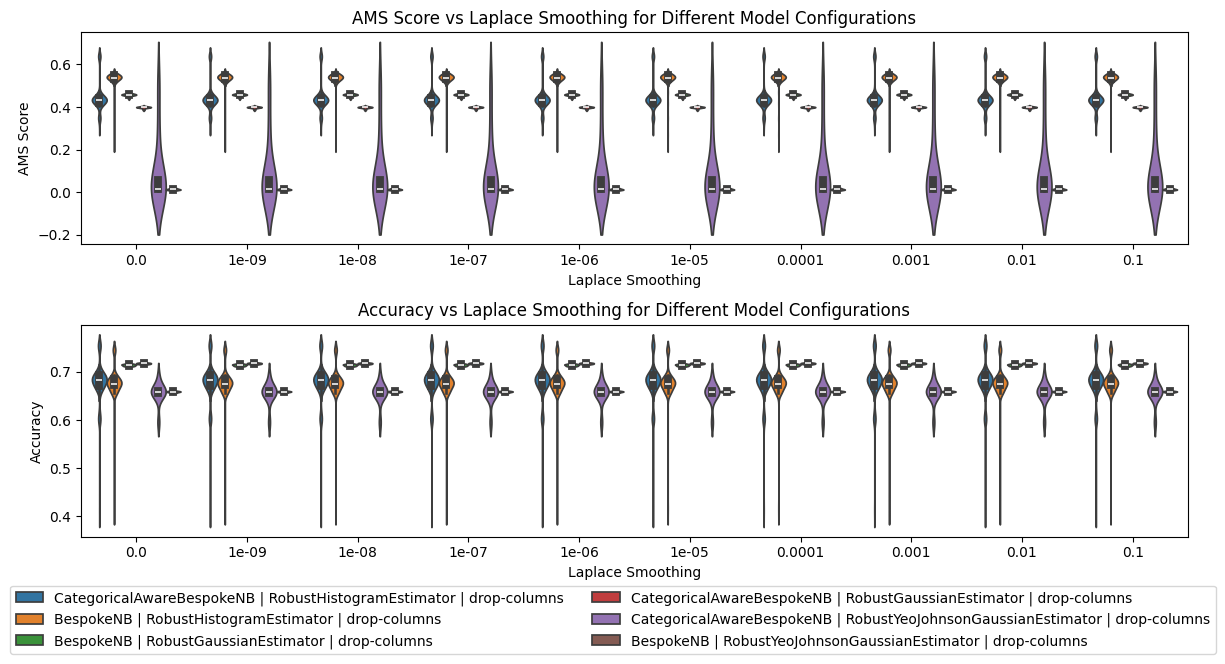

In [58]:
# Now, we can plot the AMS score against the laplace_smoothing parameter for different model configurations.
import matplotlib.pyplot as plt
import seaborn as sns

laplace_results["group"] = laplace_results.apply(
    lambda row: f"{row['model_class']} | {row['continuous_estimator_class']} | {row['dataset']}", axis=1
)
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

sns.violinplot(data=laplace_results, x="laplace_smoothing", y="ams_score", hue="group", ax=ax[0], legend=False)
ax[0].set_xlabel("Laplace Smoothing")
ax[0].set_ylabel("AMS Score")
ax[0].set_title("AMS Score vs Laplace Smoothing for Different Model Configurations")

sns.violinplot(data=laplace_results, x="laplace_smoothing", y="accuracy", hue="group", ax=ax[1], legend=True)
ax[1].set_xlabel("Laplace Smoothing")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy vs Laplace Smoothing for Different Model Configurations")
# Disable the legend, as we will create a custom one below
ax[1].legend_.remove()

plt.tight_layout()
# Add create the custom legend
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc="lower left", bbox_to_anchor=(0, -0.11))
plt.show()

One can see that the laplace smoothing parameter doesn't have absolutely any effect on the model performance, so we will ignore it for the KDE models going forward.